# **01-3 마켓과 머신러닝**
## **생선 분류하기**
* 머신러닝은 누구도 알려주지 않는 기준을 찾고 이를 적용해 물고기가 도미인지 아닌지 판별할 수 있다.

### **도미데이터 준비하기**
* 머신러닝은 여러 개의 도미 생선을 보면서 스스로 어떤 생선이 도미인지 구분할 기준을 찾으므로, 도미 생선을 많이 준비해야 함
* 도미의 길이와 무게를 가지고 이 기준을 찾아보자


* **특성(feature)**: 데이터를 표현하는 하나의 성질, 여기서는 길이와 무게

In [ ]:
# 도미의 feature를 길이와 무게로 표현
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

* matplotlib을 이용해 도미 데이터를 산점도로 나타내기

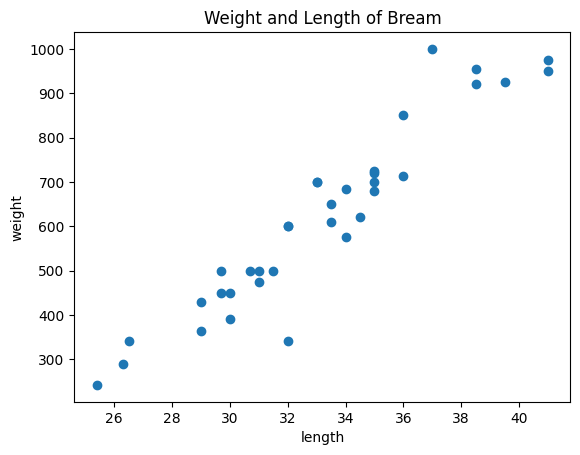

In [ ]:
# matplotlib의 pyplot 합수를 plt로 줄여서 사용
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)

# x축은 길이, y축은 무게
plt.xlabel('length')
plt.ylabel('weight')
plt.title("Weight and Length of Bream")
plt.show()

* 빙어데이터 준비하고, 도미 데이터와 하나의 산점도로 나타내기

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

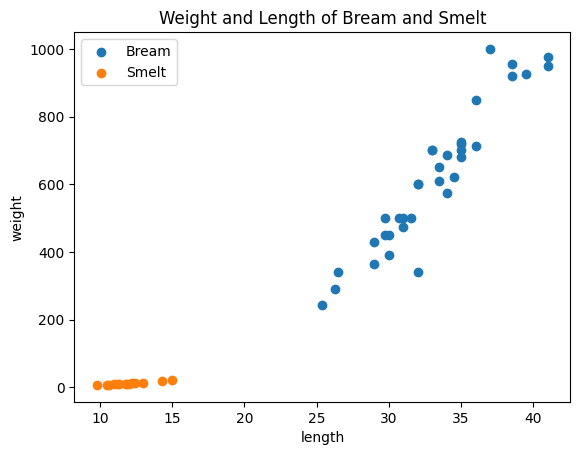

In [ ]:
plt.scatter(bream_length, bream_weight, label = "Bream")
plt.scatter(smelt_length, smelt_weight, label = "Smelt")
plt.xlabel('length')
plt.ylabel('weight')
plt.title("Weight and Length of Bream and Smelt")
plt.legend(loc = "best")
plt.show()

## **첫 번째 머신러닝 프로그램**

### **Binary classification**
* 여러 개의 종류(class) 중 하나를 구분해 내는 문제를 분류(classification)이라고 하고, 특히 여기서처럼 2개의 클래스 중 하나를 고르는 문제를 이진 분류 (binary classification)라고 합니다.

### **k-최근접 이웃 알고리즘**
> `KNeighborsClassifier(n_neighbors = 5, p = 2(uclidean distance)(2:manhattan distance), n_jobs(# of CPU to use) = 1)`  

* 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용
  * 사실 어떤 데이터를 찾기 보다는 전체 데이터를 메모리에 가지고 있는 것이 전부임

* 데이터를 모두 알고 있고 가지고 있어야 함
* 데이터가 아주 많은 경우 메모리를 많이 필요로 하고, 직선거리를 계산하는 데 많은 시간이 필요해 사용하기 어려움
* 실질적으로 무언가 훈련되는 것 없이 훈련 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 정답인지 아닌지를 구분

In [ ]:
# 도미와 빙어의 길이 및 무게 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
print('length = ', length)
print('weight = ', weight)

length =  [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
weight =  [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


#### **2차원 리스트 준비하기**
 * 사이킷런 머신러닝 패키지는 각 특성(데이터의 특징)의 리스트를 세로로 늘어뜨린 2차원 리스트(리스트의 리스트)를 만들어야 이용 가능함.

  * 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환하는 함수
> `zip(리스트, 리스트, 리스트....)`


In [ ]:
# 길이와 무게 데이터를 2차원 리스트로 만들기
fish_data = [[l,w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


#### **정답 데이터 만들기**
  * 머신러닝 알고리즘이 생선의 길이와 무게를 보고 도미와 빙어를 구분하는 규칙을 찾게 하기 위해 정답을 알려준다.
    * 도미(n = 35) = 1 (정답)
    * 빙어(n = 14) = 0 (오답)

In [ ]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### **모델 만들기**
* 사이킷런 패키지에서 k-최근접 이웃 알고리즘을 구현한 클래스(KNeighborsClassifier)를 import

In [ ]:
# 사이킷런 불러오기
import sklearn
from sklearn.neighbors import KNeighborsClassifier

* **모델(model)**: 머신러닝 알고리즘을 구현한 프로그램, 또는 프로그램이 아니더라도 알고리즘을 (수식 등으로) 구체화하여 표현한 객체

In [ ]:
# import한 KNeighborsClassifier 클래스의 객체 먼저 만들기
kn = KNeighborsClassifier()

* **훈련(training)**: 객체에 fish_data(input)와 fish_target(target)를 전달하여 도미를 찾기 위한 기준을 학습하는 것 (모델에 전달된 데이터에서 규칙을 찾는 과정)

    > `객체이름.fit(input, target)`



In [ ]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

#### **모델 평가**
* **정확도(accuracy)**: 객체(모델)이 얼마나 잘 훈련되었는지 평가하여 0~1 사이의 값 반환  
  > `객체이름.score(input,target)`  
    
  
\begin{align} {Accuarcy = {정확히 맞힌 개수 \over 전체 데이터 개수}} \end{align}


In [ ]:
# 도미 35마리와 빙어 14마리의 특성을 모두 저장하고 맞추는 거라면 답을 알고 맞추는 것이기 때문에 100%를 달성하는 것이 당연하다.
kn.score(fish_data, fish_target)

1.0

#### **새로운 데이터 예측하기**
  * 새로운 데이터 또한 리스트의 리스트 형태로 전달해야 한다.
> `predict(리스트의 리스트)`


In [ ]:
kn.predict([[30,600]])

array([1])

In [ ]:
kn.predict([[1.5,25]])

array([0])

  * kn이라는 모델은 우리가 fit() 메소드로 전달한 fish data(input)를 `_fit_X` 속성에, fish_target(target)를 `_y` 속성에 가지고 있음


> `객체이름._fit_X`

  > `객체이름._y`

In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


* k-최근접 이웃 알고리즘에 새로운 데이터가 왔을 때 몇 개의 가까운 데이터를 참고할 것인지 정할 수 있다. (Default = 5)
> `모델이름 = KNeighborsClassifier(n_neighbors = n)`

  * n_neighbors 매개변수를 데이터 전체 수로 두면 도미 수 > 빙어 수 이기 때문에, 도미만 올바르게 맞출 수 있다.



In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)

* 따라서 정확도가 떨어지게 되며, 이는 전체 데이터 수에서 도미 수의 비율과 같다.

In [ ]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
print(35/49)

0.7142857142857143


In [ ]:
# p.64 n_neighbors의 기본값인 5부터 49까지 바꿔 가며 정확도가 1.0 아래로 내려가기 시작하는 이웃의 개수를 찾아보세요.
for n in range(5, 50):
  # k-최근접 이웃 개수 설정
  kn.n_neighbors = n
  # 점수 계산
  score = kn.score(fish_data, fish_target)
  # 100% 정확도에 미치지 못하는 이웃 개수 출력
  if score < 1:
    print(n,score)
    break

18 0.9795918367346939
